<a href="https://colab.research.google.com/github/prithwijitc/ECE4803_FUML/blob/main/ECE4803_Sp23_HW2_Classification_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Georgia Institute of Technology 
# <center> ECE 4803/8803: Fundamentamentals of Machine Learning (FunML)
# <center> Spring 2023
## <center> **Homework Assignment # 2**
## <center> <font color='red'>**Solution Copy**</font>
## <center> **Due: Friday, February 03, 2023 @8PM**
## <center> **DL students in Section QF** have until the end of the weekend to submit their solutions 





**Please read the following instructions carefully.**
- The entire homework assignment is to be completed on this `ipython` notebook. It is designed to be used with `Google Colab`, but you may use other tools (e.g., Jupyter Lab) as well.
- Make sure that you execute all cells in a way so their output is printed beneath the corresponding cell. Thus, after successfully executing all cells properly, the resulting notebook has all the questions and your answers.  
- Print a PDF copy of the notebook with all its outputs printed and submit the **PDF** on `Canvas` under Assignments
- Make sure you delete any scratch cells before you export this document as a PDF. Do not change the order of the questions and do not remove any part of the questions. Edit at the indicated places only. 
- Rename the PDF according to the format:  ***LastName_FirstName_ECE_4803_8803_sp23_assignment_#.pdf*** 
- It is encouraged for you to discuss homework problems amongst each other, but any copying is strictly prohibited and will be subject to Georgia Tech Honor Code. 
- Late homework is not accepted unless arranged otherwise and in advance. 
- Comment on your codes. 
- Refer to the tutorial and the supplementary/reading materials that are posted on `Canvas` for the first lectures 3, 4 and 5 to help you with this assignment.
- **IMPORTANT:** Start your solution with a <font color='red'>**BOLD RED**</font> text that includes the words *solution* and the part of the problem you are working on. For example, start your solution for Part (c) of Problem 2 by having the first line as: 
<br> <font color='red' > **Solution to Problem 2 Part (c)**</font>. Failing to do so may result in a *20\% penalty* of the total grade.

## **Assignment Objectives:**

- Learn the fundamentals behind Naïve Bayes and Logistic Regression from both the theoretical and implemntation standpoints
- Learn the use of classes in Python
- Learn the use of performance evaluation metrics for classification tasks


## **Guide for Exporting Ipython Notebook to PDF:**
Here is a [video](https://www.youtube.com/watch?v=yXzw9Dd_Na0) summarizes how to export Ipythin Notebook into PDF.<br>
 - **[Method1: Print to PDF]**<br>
 After you run every cell and get their outputs, you can use **\[File\] -> \[Print\]** and then choose **\[Save as PDF\]** to export this Ipython Notebook to PDF for submission. <br>*Note: Sometimes figures or texts are splited into different pages. Try to tweak the layout by adding empty lines to avoid this effect as much as you can.*
 - **[Method2: colab-pdf script]**<br>
 The author of that video provided [an alternative method](https://github.com/brpy/colab-pdf) that can generate better layout PDF. However, it only works for Ipythin Notebook without embedded images.<br>
  **How to use:** Put the script below into cells at the end of your Ipythin Notebook. After you run the fisrt cell, it will ask for google drive permission. Executing the second cell will generate the PDF file in your google drive home directory. Make sure you use the correct path and file name.
 ```
## this will link colab with your google drive
from google.colab import drive
drive.mount('/content/drive')
 ```

 ```
 %%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('LastName_FirstName_ECE_4803_sp22_assignment_#.ipynb') ## change path and file name
 ```
 
**Note:**
Georgia Tech provides a student discount for Adobe Acrobat subscription. Further information can be found [here](https://faq.oit.gatech.edu/content/adobe-licensing). 

## **What is a good Strategy for FunML Homework?**

- Understand the algorithm $\rightarrow$ Implement Python code step by step $\rightarrow$ Verify the result.<br>**(Every step is important, and the order is also important.)**<br><br>

- Understand the concepts and math of the algorithm.
 - Slides
 - Reading, References, & Resources
 - Homework descriptions
<br><br>
- Prcatice Numpy techniques and skills.
 - indexing
 - dimension/broadcasting
 - mask/boolean array
<br><br>


### **Problem 1: Naïve Bayes for Classifying Real-Valued Data (40pts)**
In Lecture 2, we learnt the Naïve Bayes classification algorithm to classify discrete-valued feature data. In this problem, we extend this to real-valued data with the popular `Iris` dataset provided by the `sklearn` library. To summarize Naïve Bayes algorithm and implementation, here is **a step-by-step guide**:
 0. inspect the dataset and view it 
 1. write down the Bayes Theorem equation
 2. apply/utilize the naïve conditional independence assumption
 3. calculate the prior probabilities using the dataset
 4. model the likelihood and caluclate model parameters using the dataset. Now you have all components you need for Naïve Bayes classifier.
 5. use the likelihood and the priori to calculate posterior probabilities for the test data.
 6. categorize the test data according to the highest posterior probability value
<br>

In Homework 1, we studied the feature (input) and the target (output) of the `Iris` dataset.<br><br> *\[Execute this cell below\]*

In [ ]:
# pip install sklearn  (keep commented if sklearn already installed)
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris() 

print('Number of feature is: ' + str(len(iris['feature_names'])) + '\n') 

print('Feature names are:')
print(iris['feature_names'])

print('\nNumber of target classes is: ' + str(len(iris['target_names'])) + '\n')

print('Class names are:')
print(iris['target_names'])

Number of feature is: 4

Feature names are:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Number of target classes is: 3

Class names are:
['setosa' 'versicolor' 'virginica']


Now, we know that there are 4 features and 3 classes in `Iris` dataset, whereas $\mathbf{x}=[x_1, x_2, x_3, x_4]^T\in \mathbb{R}^4$ and $y\in\{c_0, c_1, c_2\}$, $\mathbf{x}$ being a 4-dimensional feature vector for a data point and $y$ being the corresponding label taking on values from the set $\{c_{i}\}^{2}_{i=0}$.

#### **Problem 1 (a) Review of Bayes Theorem (5pts)**
 For simplicity, we **only** take the first feature and the first two classes for this part of the problem, part 1(a). **That is, we are trying to use only "sepal length" feature to decide if a flower belongs to "setosa" or "versicolor" classes.** According to Bayes Theorem, we have: (take $c_1$ as example)<br><br>
$$P(y=c_1|x_1)=\frac{P(x_1|y=c_1)P(y=c_1)}{P(x_1)}$$ <br>
The left hand side $P(y=c_1|x_1)$ basically tells us that **given a certain feature $x_1$ ("sepal length"), the probability that this flower belongs to class $\mathbf{c_1}$ ("versicolor").** Also, we have $P(y=c_1|x_1) + P(y=c_0|x_1) = 1$, since this flower either belongs to "setosa" or "versicolor" class.<br><br>**Questions:** In the above equation, which of the terms does correspond to the likelihood, the marginal likelihood, the prior probabilites, and the posterior probabilities? 

What does $P(x_1|y=c_1)$ mean, in plain english, in this part of the problem? 

### <font color='red'>**Problem 1 (a) Solution Copy:</font>**

$P(y=c_1|x_1)$ is the posterior probability 

$P(x_1|y=c_1)$ is the likelihood

$P(y=c_1)$ is the prior probability 

$P(x_1)$ is the marginal likelihood 

$P(x_1|y=c_1)$ means the following: given that a flower belongs to versicolor class, the probability that this flower has certain sepal length feature is computed as $P(x_1|y=c_1)$. 

#### **Problem 1 (b) Naïve Bayes and Priori (5pts)**
Now, we go back to original 4 features and 3 classes setup in `Iris`, the Bayes theorem becomes:
<br><br>
$$P(y=c_k|\mathbf{x})=\frac{P(\mathbf{x}|y=c_k)P(y=c_k)}{P(\mathbf{x})}$$ <br>
Note that $\mathbf{x}$ is boldface which means it represnets a vector of feature. Since $P(\mathbf{x})$ is a multivariate distribution of 4 features, modeling it is not an easy task. This is where the **naïve assumption** comes into play&mdash;it assumes features are **conditionally independent** of each other. Hence we can decouple the likelihood:<br><br>
$$P(y=c_k|\mathbf{x})=\frac{\prod^{4}_{j=1}P(x_{j}|y=c_k)P(y=c_k)}{P(\mathbf{x})}$$ <br>

you can also observe that the denominator $P(\mathbf{x})$ is merely a scaling constant and does not depend on $y$. Therefore, we usually ignore that for our purposes and to simplify the calculations. The above formulation for Naïve Bayes then reduces to:<br>
$$P(y=c_k|\mathbf{x}) \propto \prod^{4}_{j=1}P(x_{j}|y=c_k) \times P(y=c_k)$$

Now, you can clearly notice that in order to get the posterior probabilities, we need each likelihood and the prior probabilities. We first look at the prior probabilities so that we can simply estimate $P(y=c_k)$ by calculating the ratio of each $c_k$ in the `Iris` dataset. That is $P(y=c_k)=\frac{N_{c_k}}{N}$, where $N_{c_k}$ is the number of examples in $c_k$ class, and $N$ is the number of total examples.<br><br>
**Question:** Complete the cell below that calculates the total number of examples $N$ in `Iris`, how many examples in each class $N_{c_k}$, and the value of $P(y=c_k)$ for each $k$? [You can use the table below to help yourself build the python implementation in the cell below] <br>

Hint: You may check different functions of NumPy to count the occurrences of each value in an array.


| $$P(y=0)$$ | $$P(y=1)$$ | $$P(y=2)$$ |
|   :----:   |   :----:   |   :----:   |
|            |            |            |

### <font color='red'>**Problem 1 (b) Solution Copy:</font>**

In [ ]:
labels = iris.target

'''
N: an integer value
  Number of total examples in Iris dataset.
        
N_ck: ndarray of shape (4,) 
  Number of examples in each class.

P_yck: ndarray of shape (4,)
  Priori of each class.
'''

#-----------------Don't change anything above------------------------#

N = labels.shape[0]

N_ck = np.bincount(labels)

P_yck = N_ck / N

#-----------------Don't change anything below------------------------#
print('Total number of examples in Iris: N =', end =' ')
print(N)

for i in range(3):
  print('Number of examples in class ' + str(i) + ': N_c' +str(i)+ ' =', end =' ')
  print(N_ck[i])

for i in range(3):
  print('P(y=c' + str(i) + ') =', end =' ')
  print(P_yck[i])

[50 50 50]
Total number of examples in Iris: N = 150
Number of examples in class 0: N_c0 = 50
Number of examples in class 1: N_c1 = 50
Number of examples in class 2: N_c2 = 50
P(y=c0) = 0.3333333333333333
P(y=c1) = 0.3333333333333333
P(y=c2) = 0.3333333333333333


#### **Problem 1 (c) Probabilistic Model for Likelihood (10pts)**
Next, we want to link our likelihood to probabilistic models. Each of the $P(x_{j}|y=c_k)$ terms conditions a feature variable on a target class via a probability distribution parameterized by certain parameters, $\mathbf{\theta}$. These parameters could be the mean and standard deviation of a Gaussian distribtuion in case of real-valued features, or they could just be the success rate in a Bernoulli distribution in case of binary valued $x_{j}$. In any case, these parameters are learnt during the training process from the labeled training data. It would then be more appropriate to write the above formulation as:

$$P(y=c_k|\mathbf{x}) \propto \prod^{4}_{j=1}P(x_{j}|y=c_k, \theta_{jc_k}) \times P(y=c_k),$$

where $\theta_{jc_k}$ represents the parameter set characterizing the conditional distribution of feature $j$ on class $c_k$. <br><br>

**Question:** We load a few examples in `Iris` and assume their features to be independent of each other and sampled from **Gaussian distributions**. Say $\hat{\mu}_{jc_k} = \frac{\sum^{N}_{i=1}x_{ij}\times \mathbb{1}_{y_{i}=c_k}}{N_{c_k}}$ and $\hat{\sigma}_{jc_k} = \sqrt{\frac{\sum^{N}_{i=1}(x_{ij} - \hat{\mu}_{jc_k})^{2}\times \mathbb{1}_{y_{i}=c_k}}{N_{c_k}}}$. $\mu_{jc_k}, \sigma_{jc_k}$ refer to the mean and st. deviation, respectively, of the $j-th$ feature variable in class $c_k$, $i$ refers to the training example number, and $\mathbb{1}_{cond}$ is the identity function that takes the value 1 when the $cond$ is true and 0 otherwise. Complete the cell below that calculates values of the mean, $\hat{\mu}$, and std, $\hat{\sigma}$, for every feature and for each class. [You can use the table below to help yourself build the python implementation in the cell below] <br>





|       | $\hat{\mu}_{1y}$ | $\hat{\mu}_{2y}$ | $\hat{\mu}_{3y}$ | $\hat{\mu}_{4y}$
| :---  |      :----:      |      :----:      |      :----:      |      :----:      |
| $y=0$ |                  |                  |                  |                  |
| $y=1$ |                  |                  |                  |                  |
| $y=2$ |                  |                  |                  |                  |

|       | $\hat{\sigma}_{1y}$ | $\hat{\sigma}_{2y}$ | $\hat{\sigma}_{3y}$ | $\hat{\sigma}_{4y}$
| :---  |      :----:      |      :----:      |      :----:      |      :----:      |
| $y=0$ |                  |                  |                  |                  |
| $y=1$ |                  |                  |                  |                  |
| $y=2$ |                  |                  |                  |                  |

### <font color='red'>**Problem 1 (c) Solution Copy:</font>**

In [ ]:
features = iris.data[1::17, :]
labels = iris.target[1::17]

print('A subset of the Iris dataset:')
print('example number  x1  x2  x3  x4   y')
for i in range(9):
  print('      '+ str(i+1), end ='        ')
  print(features[i, :], end =' ')
  print(labels[i])

'''
mu: ndarray of shape (3, 4)
  Numpy array containing mu_jck.

sigma: ndarray of shape (3, 4)
  Numpy array containing sigma_jck.
'''
mu = np.zeros((3, 4))
sigma = np.zeros((3, 4))

#-----------------Don't change anything above------------------------#

mu = (features[::3] + features[1::3] + features[2::3]) / 3

sigma = np.sqrt((np.square(features[::3] - mu) + np.square(features[1::3] - mu) + np.square(features[2::3] - mu)) /3)

#-----------------Don't change anything below------------------------#
with np.printoptions(precision=8, floatmode='fixed'):
  print('\nAnswer:')
  print('     mu_1y      mu_2y      mu_3y      mu_4y')
  for i in range(3):
    print('y=' + str(i), end =' ')
    print(mu[i])

  print('\n     sigma_1y   sigma_2y   sigma_3y   sigma_4y')
  for i in range(3):
    print('y=' + str(i), end =' ')
    print(sigma[i])

A subset of the Iris dataset:
example number  x1  x2  x3  x4   y
      1        [4.9 3.  1.4 0.2] 0
      2        [5.7 3.8 1.7 0.3] 0
      3        [5.  3.2 1.2 0.2] 0
      4        [6.9 3.1 4.9 1.5] 1
      5        [5.6 2.5 3.9 1.1] 1
      6        [6.7 3.1 4.7 1.5] 1
      7        [6.3 2.9 5.6 1.8] 2
      8        [6.9 3.2 5.7 2.3] 2
      9        [6.4 3.1 5.5 1.8] 2

Answer:
     mu_1y      mu_2y      mu_3y      mu_4y
y=0 [5.20000000 3.33333333 1.43333333 0.23333333]
y=1 [6.40000000 2.90000000 4.50000000 1.36666667]
y=2 [6.53333333 3.06666667 5.60000000 1.96666667]

     sigma_1y   sigma_2y   sigma_3y   sigma_4y
y=0 [0.35590261 0.33993463 0.20548047 0.04714045]
y=1 [0.57154761 0.28284271 0.43204938 0.18856181]
y=2 [0.26246693 0.12472191 0.08164966 0.23570226]


#### **Problem 1 (d) Inference (10pts)**
Finally, we have our classifier trained on the subset of `Iris`, and we can use this model for inferencing. The inference phase, also referred to as testing phase, is carried out by obtaining the likelihoods of all test data points by sampling them from the parameterized distributions learnt earlier, and then maximizing the posterior over all possible labels, as shown below:

$$\hat{y} = \underset{c_k}{\operatorname{argmax}} \prod^{4}_{j=1}P(x^{test}_{j}|y=c_k, \theta_{jc_k}) \times P(y=c_k)$$

The $\hat{y}=c_k$ associated with the highest posterior probility is the classified result of the test data. This is called the **Maximum a posteriori (MAP) estimation**. Alternatively, the prior may be set to be uniform, in which case the formulation reduces to just maximizing the conditional data likelihoods, in what is known as the **Maximum Likelihood Estimation (MLE)**. 

An issue that frequently occurs with long chains of probability products is that of numerical underflow i.e., the computer is unable to handle extremely high levels of precision required and forces the result to just be zero. This is often circumvented by computing the logs of the probabilities rather than the raw probabilities themselves, turning the product chain into a summation chain. The maximization may then be carried out in the log space ($e$ as base). This is made possible by the monotonic behavior of the log function&mdash;what minimizes or maximizes $f(x)$ also minimizes or maximizes, respectively, $\text{log} f(x)$. The restructured formulation is given below:

$$\hat{y} = \underset{c_k}{\operatorname{argmax}} \sum^{4}_{j=1}\text{log} P(x^{test}_{j}|y=c_k, \theta_{jc_k}) +  \text{log}P(y=c_k)$$

To obtain the posteriors back, one may always exponentiate the expression on the right hand side, and normalize afterwards.<br><br>

**Questions:** In problem 1 (b), we calculated $P(y=c_k)$. In problem 1 (c), we calculated $\mu_{jc_k}$ and $\sigma_{jc_k}$ for the Gaussian likelihood model, $P(x_{j}|y=c_k)= \mathcal{N}(\mu_{jc_k}, \sigma_{jc_k}^2)$. You will need to use those numbers to answer the following questions.

**_i)_** Write down the log form of the likelihood function. In other words, what is $\text{log} P(x_{j}|y=c_k)$? Then complete the `log_gaussian` function.

**_ii)_** Suppose you are given a test data sample, flower with feature $\mathbf{x}^{test}=[5, 3, 1, 0.5]^T$. Compute the posteriors for this given sample by hand, calculator, or numpy. Then, complete the calculation of the variable `posteriors` in the cell below.

**_iii)_** Finally, according to the result above, to which class does this test example belong? Also, complete the calculation of the variable `y_hat` in the cell below.<br>

[You should answer this question both in a text cell and the code cell below]

### <font color='red'>**Problem 1 (d) Solution Copy:</font>**

 **Solution to i)**<br>
 $\text{log} P(x^{test}_{j}|y=c_k, \theta_{jc_k}) = -\text{log}(\sigma_{jc_k}\sqrt{2\pi})-\frac{1}{2}(\frac{x_j^{test}-\mu_{jc_k}}{\sigma_{jc_k}})^2$ <br><br>
 
 **Solution to ii)**<br>
 $\frac{\prod^{4}_{j=1}P(x^{test}_{j}|y=c_0, \theta_{jc_0}) \times P(y=c_0)}{P(x^{test})}\approx 1$<br>
 $\frac{\prod^{4}_{j=1}P(x^{test}_{j}|y=c_1, \theta_{jc_1}) \times P(y=c_1)}{P(x^{test})}\approx 0$<br>
$\frac{\prod^{4}_{j=1}P(x^{test}_{j}|y=c_2, \theta_{jc_2}) \times P(y=c_2)}{P(x^{test})}\approx 0$<br><br>

 **Solution to iii)**<br>
 This example belongs to class $c_0$, since it has the highest posterior.

In [ ]:
x_test = np.array([[5, 3, 1, 0.5]])

'''
posteriors: ndarray of shape (3,)
  Numpy array containing posteriers for each class

y_hat: an integer value
  Classified result of the test data.

'''

#-----------------Don't change anything above------------------------#

## question i
def log_gaussian(x, mean, std):
  """Function computes log P(x) from a normal distribution specified by 
  parameters mean and std."""
  
  log_likelihood = -np.log(std*np.sqrt(2*np.pi)) - 0.5*((x-mean)/std)**2
  
  return log_likelihood

## question ii

numerator = np.exp(np.sum(log_gaussian(x_test, mu, sigma), axis=1) + np.log(P_yck))

posteriors = numerator / np.sum(numerator)

## question iii
y_hat = np.argmax(np.sum(log_gaussian(x_test, mu, sigma), axis=1) + np.log(P_yck))

#-----------------Don't change anything below------------------------#
print('y_hat=', end=' ')
print(y_hat)

print('posteriors =', end=' ')
print(posteriors)


y_hat= 0
posteriors = [1.00000000e+00 9.40957643e-14 0.00000000e+00]


#### **Problem 1 (e) Naïve Bayes Classifier Implementation (10pts)**
Finally, you are going to implement your very own Naïve Bayes classifier, with its `fit()` and `predict()` functions, among others. We will work with the `Iris` dataset as an example, but the class should be able to take as input any other real valued feature data of any number of features and training examples, and be able to predict classes based on the MAP principle for unseen test data, as well as return the normalized posterior probabilities. Since we are working with real-valued data, we are going to impose the conditional feature distributions to be gaussians parameterized by two paramaters, mean ($\mu$) and standard deviation ($\sigma$). 

**_i)_** Complete the `log_gaussian()` function. This should be similar to problem 1 (d).

**_ii)_** Complete the `fit()` function. This function fits the model parameters to the dataset. This should be similar to problem 1 (b) and (c).

**_iii)_** Complete the `predict` function. It uses the parameters calculated in ii), perform inference on test data by computing the posterior probabilities for each point in the test set and then selecting the class corresponding to the highest posterior. This should be similar to problem 1 (d).



> Do not change the function definitions for the functions defined in the *MyNaiveBayes* class template below. They should take inputs and output results of the form indicated. You are free to add other internal functions and use them inside the class definition as you see convenient. However, that should not change the external code's structure, nor the shape and form of the outputs returned. **_Note_**: Any variable preceded by the `self.` keyword gets stored by the class structure and can be used and changed afterwards inside the class regardless of whether the function that first made it returns it or not.





### <font color='red'>**Problem 1 (e) Solution Copy:</font>**

In [ ]:
# implement naive bayes class for iris

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class MyNaiveBayes:
    def __init__(self, X_train, y_train):
        """Function intializes the Naive Bayes class.
        
        Parameters:
        -----------
        X_train: ndarray of shape (N,D)
            Numpy array containing N training examples, each D dimensional.
        
        y_train: ndarray of shape (N,)
            Numpy array containing vector of ground truth classes for examples 
            in X_train
        """
        
        self.X_train = X_train
        self.y_train = y_train
        
    ## quetion i
    def log_gaussian(self, x, mean, std):
        """Function computes log P(x) from a normal distribution specified by 
        parameters mean and std. To be called during inference"""
        
        log_likelihood = -np.log(std*np.sqrt(2*np.pi)) - 0.5*((x-mean)/std)**2
 
        
        return log_likelihood
    
    ## quetion ii
    def fit(self):
        """Function computes likelihood parameters from training data in the \
        training phase"""
                
        self.priors = (np.bincount(self.y_train)/self.y_train.size)
        
        # calculate per class data likelihoods
        self.feature_means = np.zeros((self.priors.size, self.X_train.shape[1]))
        self.feature_std = np.zeros((self.priors.size, self.X_train.shape[1]))
        
        for i in range(self.priors.size):
            self.feature_means[i] = np.mean(self.X_train[self.y_train == i], axis=0)
            self.feature_std[i] = np.std(self.X_train[self.y_train == i], axis=0)
        
        
    ## quetion iii
    def predict(self, X_test):
        """Function computes the normalized posterior probabilities and class \
        predictions for the provided test data.
        
        Parameters:
        -----------
        X_test: ndarray of shape (N,D)
            2D numpy array containing N testing examples having D dimensions each.
               
        Returns:
        --------
        y_pred: ndarray of shape (N,1)
            vector containing class predictions for each of the N training\
             points in X_test.
               
        posteriors: ndarray of shape (N,C)
            numpy array containing normalized class posterior probabilities \
            for each of the C classes for each training example.
                   
        """

        # compute per class posteriors for test data
        ### without for loop
        posteriors = np.exp(np.sum(self.log_gaussian(X_test[:, np.newaxis, :], self.feature_means[np.newaxis, :, :], self.feature_std[np.newaxis, :, :]), axis=-1) + np.log(self.priors[np.newaxis, :]))
        
        ### using for loop
        #for i in range(self.priors.size):
        #    posteriors[:, i] = np.exp(np.sum(self.log_gaussian(X_test, self.feature_means[i], self.feature_std[i]), axis=1) + np.log(self.priors[i]))

        # perform inference
        posteriors = (posteriors / np.sum(posteriors, axis=1).reshape(-1,1))
        y_pred = np.argmax(posteriors, axis=1)
        
        return y_pred, posteriors

#-----------------Don't change anything below------------------------#

# define train and test sizes
N_train = 20
N_test = 150 - N_train

# load data
iris = load_iris()
X, y = iris.data, iris.target

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=N_test, 
                                                    train_size=N_train, 
                                                    random_state=4803)

model = MyNaiveBayes(X_train, y_train)
model.fit()
y_pred, _ = model.predict(X_test)

print("Accuracy Score: %.3f" % accuracy_score(y_test, y_pred))   

Accuracy Score: 0.938


### **Problem 2: Logistic Regression for Binary Classification (40pts)**
Logistic regression is a popular machine learning algorithm for binary classification problems. Here, we will use the `breast_cancer` dataset in `sklearn` to guide you through building your own classifier. The target variable $y$ can be modeled as a binary random variable taking on values in the set $[0,1]$ via a bernoulli distribution characterized by the probability of success, $p$, conditioned on the $d-$dimensional feature vector $\mathbf{x}\in\mathbb{R}^{d}$. Additionally, $p$ is obtained by taking the sigmoid of $\mathbf{x}$. This formulation is shown below:

\begin{align}
P(y|\mathbf{x}) &= Ber(y;p) \\
         &= Ber(y;\sigma(\mathbf{x})) \\
         &= \sigma(\mathbf{x})^{y}\times (1-\sigma(\mathbf{x}))^{1-y}, \quad\quad (1)
\end{align}<br>
where $\sigma(\mathbf{x}) = \frac{1}{1+e^{-w^{T}\mathbf{x}}}$ and $w\in\mathbb{R}^{d}$ is the parameter that we want to learn from dataset. You may notice: when $y=0$, $P(y=0|\mathbf{x})=1-\sigma(\mathbf{x})$, and when $y=1$, $P(y=1|\mathbf{x})=\sigma(\mathbf{x})$. It's the same as in the Lecture 3 page 12 with $b=0$.

#### **Problem 2 (a) Sigmoid Function (5pts)**
Please complete the sigmoid function in the cell below. Calculate $P(y=0|\mathbf{x})$ and $P(y=1|\mathbf{x})$ with the given $w1$ and $w2$ separately and a test data feature $x$ from `breast_cancer` dataset.

### <font color='red'>**Problem 2 (a) Solution Copy:</font>**

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x = cancer.data[0, :].reshape(1, -1)
y = cancer.target[0]

w1 = np.full(30, 0.002).reshape(-1, 1)
w2 = np.full(30, -0.002).reshape(-1, 1)

'''
P_y0x_w1: A float value
  Conditional probability of y=0 given x with w1.

P_y1x_w1: A float value
  Conditional probability of y=1 given x with w1.

P_y0x_w2: A float value
  Conditional probability of y=0 given x with w2.

P_y1x_w2: A float value
  Conditional probability of y=1 given x with w2.

'''

#-----------------Don't change anything above------------------------#

def sigmoid(X, w):
  """Computes sigmoid for given data array X and parameter w"""
  
  sigmoid_val = 1/ (1 + np.exp(-np.dot(X,w))) 
  
  return sigmoid_val

P_y0x_w1 = 1 - sigmoid(x, w1)
P_y1x_w1 = sigmoid(x, w1)

P_y0x_w2 = 1 - sigmoid(x, w2)
P_y1x_w2 = sigmoid(x, w2)

#-----------------Don't change anything below------------------------#
print('feature x=', end=' ')
print(x)
print('label y=', end=' ')
print(y)

print('\nUsing w1:')
print('P(y=0|x)=', end=' ')
print(P_y0x_w1)

print('P(y=1|x)=', end=' ')
print(P_y1x_w1)

print('\nUsing w2:')
print('P(y=0|x)=', end=' ')
print(P_y0x_w2)

print('P(y=1|x)=', end=' ')
print(P_y1x_w2)

feature x= [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]]
label y= 0

Using w1:
P(y=0|x)= [[0.0007982]]
P(y=1|x)= [[0.9992018]]

Using w2:
P(y=0|x)= [[0.9992018]]
P(y=1|x)= [[0.0007982]]


#### **Problem 2 (b) Logistic Regression Cost Function (10pts)**
After we know the formulation of the logistic regression, we need to know how to train the parameter $w$ using dataset. In part (a), we already see that different $w$ can provide very different $P(y|\mathbf{x})$. Hence, our target here is to find the best $w$ that maximizes $P(y|\mathbf{x})$ for the training data. As before, it is easier to work with logs of probabilities than the raw probabilities themselves, so we take the log on both sides of (1) to obtain:

$$\text{log } P(y|x) = y\times \text{log }\sigma(\mathbf{x})+(1-y)\times \text{log }(1 - \sigma(\mathbf{x}))$$

The model training involves maximizing $\text{log } P(y|x)$ over all possible values of $w$ via an MLE formulation. The equivalent of this is to minimize the negative log-likelihood, $-\text{log } P(y|x)$ over $w$. This optimization problem is shown below:

$$w^{*} = \underset{w}{\operatorname{argmin}} -y\times \text{log }\sigma(\mathbf{x})-(1-y)\times \text{log }(1 - \sigma(\mathbf{x}))$$

Since the training data usually consists of multiple labeled training examples, $\mathcal{D}=\{(\mathbf{x}_{i},y_{i})\}^{N}_{i=1}$, the optimization is carried out over the expected log likelihood loss, as shown below:

\begin{align}
w^{*} &= \underset{w}{\operatorname{argmin}} \underset{(\mathbf{x},y)\backsim P(\mathbf{x},y)}{\mathbb{E}}[-y\times \text{log }\sigma(\mathbf{x})-(1-y)\times \text{log }(1 - \sigma(\mathbf{x}))] \\
&= \underset{w}{\operatorname{argmin}} \frac{1}{N}\sum^{N}_{i=1}-y_{i}\times \text{log }\sigma(\mathbf{x}_{i})-(1-y_{i})\times \text{log }(1 - \sigma(\mathbf{x}_{i})) = LL(\mathbf{x},y,w) \quad \quad (2)
\end{align}
Equation (2) is the cost function of logistic regression, and by minimizing this cost function with $w$, we can maximize the $P(y|\mathbf{x})$ for the training data.<br><br>
**Question:** Complete the cost function in the cell below. Calculate the cost function value using the given  $w_1$  and  $w_2$  separately with the data from breast_cancer dataset. (You may need to use the sigmoid function in problem 2 (a)) Which $w$ is better? $w_1$ or $w_2$?

### <font color='red'>**Problem 2 (b) Solution Copy:</font>**

In [ ]:
cancer = load_breast_cancer()
data = cancer.data
label = cancer.target

w1 = np.full(30, 0.002).reshape(-1, 1)
w2 = np.full(30, -0.002).reshape(-1, 1)

'''
cost_1: A float value
  Cost function value with w1.

cost_2: A float value
  Cost function value with w2.

'''

#-----------------Don't change anything above------------------------#

def logit_cost_func(w, X, y):
  """function computes value of cost function given the w vector, the feature data, and corresponding labels
  """
  
  cost = np.sum(- y.reshape(-1, 1) * np.log(sigmoid(X, w)) - (1 - y.reshape(-1, 1)) * np.log(1 - sigmoid(X, w))) / X.shape[0]
  
  return cost

cost_1 = logit_cost_func(w1, data, label)

cost_2 = logit_cost_func(w2, data, label)

#-----------------Don't change anything below------------------------#
print('Cost function value with w1:', end=' ')
print(cost_1)
print('Cost function value with w2:', end=' ')
print(cost_2)

Cost function value with w1: 2.16773861630246
Cost function value with w2: 1.6662547928342286


$w_2$ is better since it has lower cost.

#### **Problem 2 (c) Solve the Optimization Problem with Gradient Descent (10pts)**
Now, our target is to find the $w$ associated to the minimum of the cost function (2). You may remember from your calculus classes how the derivative is used to calculate the minima/maxima of a function. This is done by obtaining the expression for the derivative, setting it equal to zero, and then solving for the equation.<br>

However, in the case of the logistic regression cost function, there is no closed form solution to the equation; rather the equation is solved via an iterative minimization algorithm called the **Gradient Descent**. Training may be stopped once the algorithm has sufficiently converged, as measured by either the amount of change happening to the cost function over successive iterations, or by prespecifying the number of iterations. The expression for the gradient of the logistic regression objective function is given below:

$$\frac{\partial LL(\mathbf{x},y,w)}{\partial w_{j}} = -\frac{1}{N}\sum^{N}_{i=1} (y_{i} - \sigma(\mathbf{x}_{i}))x_{ji},$$

where $w_{j}$ is component of the vector $w$ and $x_{j}$ the *j-th* component of the *i-th* training example, $\mathbf{x}_{i}.$ Each gradient descent step performs the following update:

$$w_{j}^{k+1} = w_{j}^{k} - \text{step} \times \frac{\partial LL(\mathbf{x},y,w)}{\partial w_{j}}, \quad k=0,1,\dots,K$$<br><br>

**Question:** Complete the gradient of cost function and gradient descent function in the below cell. Use the provided parameters to get the $w^K$.

### <font color='red'>**Problem 2 (c) Solution Copy:</font>**

In [ ]:
cancer = load_breast_cancer()
data = cancer.data
label = cancer.target

w0 = np.full(30, 0).reshape(-1, 1) # initial w0
num_epochs = 100  ## K
step_size = 0.0001 ## step size

'''
w_K: ndarray of shape (D, 1)
  The parameter vector that the graident descent ends up with.

'''

#-----------------Don't change anything above------------------------#

def logit_grad(w, X, y):
  """Function computes the gradient of the logistic regression given the w vector, 
  the data tensor , and corresponding targets"""
  
  grad = -(np.sum((y.reshape(-1,1) - sigmoid(X, w).reshape(-1,1))*X, axis=0) / X.shape[0]).reshape(-1,1)

  return grad

def grdient_descent(w0, X, y, num_epochs=20, step=2):
  """Function performs gradient descent to compute optimal w.
  
  Parameters:
  -----------
  w0: ndarray of shape (D,),
      initial of parameter vector w.

  X: ndarray of shape (N, D),
      feature tensor of dataset.

  y: ndarray of shape (N,),
      label vector of dataset.

  num_epochs: int, 
      integer specifying the number of training epochs for the gradient descent algorithm.
      
  step: float,
      float specifying the step size in the gradient descent algorithm.
  
  """
  w = w0
  for epoch in range(num_epochs):

    w = w - step * logit_grad(w, X, y) 

  return w

w_K = grdient_descent(w0, data, label, num_epochs, step_size)

#-----------------Don't change anything below------------------------#
print('w^K =', end=' ')
print(w_K)

w^K = [[ 1.40313714e-02]
 [ 2.60313351e-02]
 [ 8.58981078e-02]
 [ 1.23094523e-01]
 [ 1.46600786e-04]
 [ 4.96865930e-05]
 [-7.81343956e-05]
 [-3.99877235e-05]
 [ 2.76785560e-04]
 [ 1.09541419e-04]
 [ 9.18615082e-05]
 [ 2.08930875e-03]
 [ 5.39365876e-04]
 [-2.63567931e-02]
 [ 1.28138873e-05]
 [ 2.11292153e-05]
 [ 2.14648965e-05]
 [ 9.51987801e-06]
 [ 3.48894881e-05]
 [ 5.60290574e-06]
 [ 1.34450111e-02]
 [ 3.31080070e-02]
 [ 8.19110281e-02]
 [-9.38450272e-02]
 [ 1.91528645e-04]
 [ 5.73557155e-05]
 [-9.93683636e-05]
 [-1.55273115e-05]
 [ 3.98595810e-04]
 [ 1.22092134e-04]]


#### **Problem 2 (d) Logistic Regression Classifier Implementation (15pts)**
Finally, for the inference phase on the test data, the trained weights are used to compute posterior probabilities on test examples, which are then classified as belonging to either of the two classes depending on if the posterior is greater than or less than $0.5$, as shown below:

\begin{align}
&P(y|\mathbf{x}^{test}_{i}) = \sigma(w^{T}\mathbf{x}^{test}_{i}) \\ \\
&\hat{y} = \begin{cases}1 \quad P(y|\mathbf{x}^{test}_{i})>0.5\\0 \quad  \text{otherwise}\end{cases}
\end{align}                   

In this exercise, you are going to implement your very own Logistic Regression class, with its `fit()` and `predict()` functions, among others. We will work with the `breast_cancer` dataset (accessed via `load_breast_cancer` function in `sklearn`) as an example, but the class should be able to take as input any other real valued feature data of any number of features and training examples, and be able to predict binary classes based on the MLE principle for unseen test data, as well as return the normalized posterior probabilities. Carefully read the questions below and answer them appropriately.

**_i)_** Complete the `sigmoid` function. This should be similar to problem 2 (a).

**_ii)_** Complete the `logit_cost_func` function. This should be similar to problem 2 (b).

**_ii)_** Complete the `logit_grad` function. This should be similar to problem 2 (c).

**_iv)_** Complete the `fit` function with gradient descent algorithm. This should be similar to problem 2 (c).

**_v)_** Implement the prediction routine elaborated above in the body of the `predict` function below. Finally, execute the code cell and describe what you observe.

**_vi)_** Assuming you implemented everything correctly, the algorithm should have worked and yet, it fails to perform decently. The reason for that is the un-normalized and un-scaled training and test data. Uncomment the line below performing the normalization and execute the code cell again. The performance should be much better. Interestingly, normalizing the data makes little to no difference to the performacne of the naive bayes classifier. Go back to Question 1 and verify this for yourselves. Why do you think normalization is so vital for Logistic Regression but hardly matters for Naïve Bayes?

> Do not change the function definitions for the functions defined in the MyLogisticRegression class template below. They should take inputs and output results of the form indicated. You are free to add other internal functions and use them inside the class definition as you see convenient. However, that should not change the external code's structure, nor the shape and form of the outputs returned. **_Note_**: Any variable preceded by the `self.` keyword gets stored by the class structure and can be used and changed afterwards inside the class regardless of whether the function that first made it returns it or not. 

### <font color='red'>**Problem 2 (d) Solution Copy:</font>**

Accuracy Score: 0.89

True Positive Rate: 0.93
False Positive Rate: 0.18


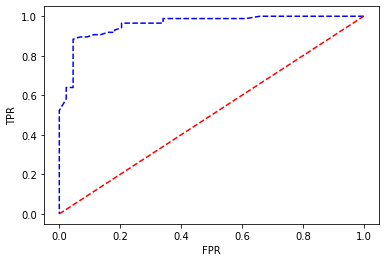

In [ ]:
import numpy as np
from numpy.linalg import norm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

class MyLogisticRegression:    
    def __init__(self, X, y):    
        """Function intializes the Logistic Regression class.
        
        Parameters:
        -----------
        X_train: ndarray of shape (N,D)
            Numpy array containing N training examples, each D dimensional.
        
        y_train: ndarray of shape (N,)
            Numpy array containing vector of ground truth classes for examples in X_train
        """
        
        self.X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
        self.y = y
        self.w  = np.random.randn(self.X.shape[1],1)
        
    ## question i
    def sigmoid(self, X, w):
        """Computes sigmoid for given data array X"""
        
        return 1/(1+np.exp(-X.dot(w)))

    ## question ii
    # define logistic regression cost function
    def logit_cost_func(self, w, X, y):
        """function computes value of cost function given the w vector, the feature tensor, and corresponding targets
        """

        return np.sum(- y.reshape(-1, 1) * np.log(self.sigmoid(X, w)) - (1 - y.reshape(-1, 1)) * np.log(1 - self.sigmoid(X, w))) / X.shape[0]
    
    ## question iii
    # define gradient function
    def logit_grad(self, w, X, y):
        """Function computes the gradient of the logistic regression given the w vector, 
        the tensor , and corresponding targets"""
    
        return -(np.sum((y.reshape(-1,1) - self.sigmoid(X, w).reshape(-1,1))*X, axis=0) / X.shape[0]).reshape(-1,1)

    ## question iv
    def fit(self, num_epochs=20, step=2):
        for epoch in range(num_epochs):
            #print("Epoch: [%d/%d]"%(epoch, num_epochs), "| Gradient magnitude: %.2f" % norm(self.logit_grad(self.w, self.X, self.y),2))
            self.w = self.w - step * self.logit_grad(self.w, self.X, self.y) 
            
    ## question v   
    def predict(self, X):  
        """Function computes the normalized posterior probabilities and class predictions for the provided test data.
        
        Parameters:
        -----------
        X: ndarray of shape (N,D)
            2D numpy array containing N testing examples having D dimensions each.
               
        Returns:
        --------
        y_pred: ndarray of shape (N,1)
            vector containing class predictions for each of the N training points in X_test.
               
        probs: ndarray of shape (N,1)
            numpy array containing normalized class posterior probabilities for each of the positive class
                   
        """
        X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
        y_pred = np.zeros(X.shape[0]).reshape(-1,1).astype(int)
        probs = self.sigmoid(X, self.w)
        y_pred[probs > 0.5] = 1
        
        return y_pred, probs
 

def roc(probs, y_test):
    """Function returns TPR and FPR given a vector of probabilities and another 
    for ground-truth predictions"""
    
    thresholds = np.linspace(0,1,100)
    mask = (probs > thresholds)*1 
    TPR = np.sum(mask * y_test.reshape(-1,1), axis=0) / y_test.sum()
    FPR = np.sum(mask * (1-y_test.reshape(-1,1)), axis=0) / (1 - y_test).sum()
    
    return TPR, FPR

#-----------------Don't change anything below------------------------#

# define train and test sizes
N_train = 20
N_test = 150 - N_train

# load data
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Normalize X
X = (X - np.min(X, axis=0, keepdims=True)) / (np.max(X, axis=0, keepdims=True) - np.min(X, axis=0, keepdims=True))

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=N_test, train_size=N_train, random_state=4803)

# train model and predict on test data
model =  MyLogisticRegression(X_train, y_train)
model.fit(num_epochs = 50, step=2)
y_pred, probs = model.predict(X_test)

# compute accuracy
print("Accuracy Score: %.2f" % accuracy_score(y_pred, y_test))
print("\nTrue Positive Rate: %.2f" % (np.sum(y_pred.reshape(-1,1) * y_test.reshape(-1,1))/np.sum(y_test)))
print("False Positive Rate: %.2f" % (np.sum(y_pred.reshape(-1,1) * (1 - y_test).reshape(-1,1))/np.sum(1 - y_test)))

# plot ROC
TPR, FPR = roc(probs, y_test)
plt.plot(FPR, TPR, linestyle='--', color='blue') 
plt.plot([0,1],[0,1], linestyle='--', color='red') 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


### <font color='red'>**Problem 2 (d) vi Solution Copy:</font>**


Unscaled feature values can result in problems during training, resulting in unstable convergence of $w$ parameters. It is good practice to standardize both the inputs and outputs before training with logistic regression algorithm, especially if the original values are on very different scales. 

Naive Bayes on the other hand simply uses the feature values to calculate mean and standard deviation parameters for gaussians that are later used to sample the probability of various feature values in test phase. Normalization is thus not needed for this case. 

#### **Problem 2 (e) Effect of Learning Rate (Check)**

In this part, you will observe the effect of the learning rate on the algorithm's performance. Up until this part, you have used the step parameter as 2. Now, you will experiment with a few values to see the effect of the learning rate. Input the learning rates as 0.05, 2, and 100, respectively. Which one of these values produces a classifer with the highest accuracy? Discuss the issues by the other two learning rates. 

### <font color='red'>**Problem 2 (e) vi Solution Copy:</font>**

Accuracy Score: 0.40

True Positive Rate: 0.28
False Positive Rate: 0.36


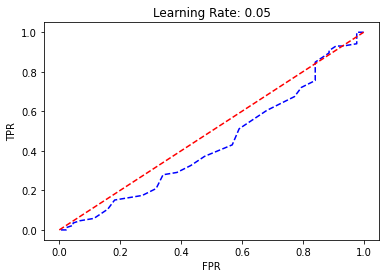

Accuracy Score: 0.91

True Positive Rate: 0.94
False Positive Rate: 0.16


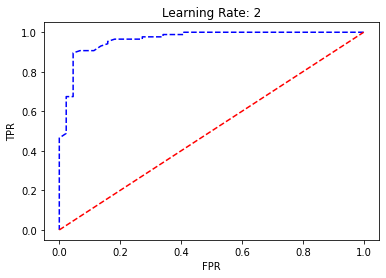

Accuracy Score: 0.92

True Positive Rate: 0.93
False Positive Rate: 0.09


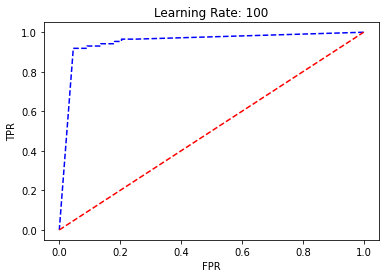

In [ ]:
import numpy as np
from numpy.linalg import norm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt



# define train and test sizes
N_train = 20
N_test = 150 - N_train

# load data
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Normalize X
X = (X - np.min(X, axis=0, keepdims=True)) / (np.max(X, axis=0, keepdims=True) - np.min(X, axis=0, keepdims=True))

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=N_test, train_size=N_train, random_state=4803)



#-----------------Don't change anything above------------------------#

learning_rates = [0.05, 2, 100]

#-----------------Don't change anything below------------------------#
for curr_lr in learning_rates:
  # train model and predict on test data
  model =  MyLogisticRegression(X_train, y_train)
  model.fit(num_epochs = 50, step=curr_lr)
  y_pred, probs = model.predict(X_test)

  # compute accuracy
  print("Accuracy Score: %.2f" % accuracy_score(y_pred, y_test))
  print("\nTrue Positive Rate: %.2f" % (np.sum(y_pred.reshape(-1,1) * y_test.reshape(-1,1))/np.sum(y_test)))
  print("False Positive Rate: %.2f" % (np.sum(y_pred.reshape(-1,1) * (1 - y_test).reshape(-1,1))/np.sum(1 - y_test)))

  # plot ROC
  TPR, FPR = roc(probs, y_test)
  plt.plot(FPR, TPR, linestyle='--', color='blue') 
  plt.plot([0,1],[0,1], linestyle='--', color='red') 
  title_str = "Learning Rate: " + str(curr_lr)
  plt.title(title_str)
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.show()


If the learning rate is too large, the algorithm may "overshoot" the optimal value. Similarly, if it is too small, too many iterations will be needed for the algorithm to converge to the best values.

#### **Problem 2 (f) L2 Regularization (Check)**

A challenge in machine learning is to create an algorithm that is generlizable, i.e., works for data beyond the training data. Several strategies that are used in machine learning are explicitly designed to reduce the test error, possibly at the expense of increased training error. A subset of these strategies are known collectively as regularization techniques. 

One of the simplest and most common technicques to induce parameter norm penalty is the $L_2$ parameter norm penalty, known as weight decay. By adding $L_2$ normalization to our cost function, from above, we get the following: 

$$LL_{Regularized}(\mathbf{x},y,w) = LL(\mathbf{x},y,w) + \alpha * (w^T\cdot w)$$

$$\frac{\partial LL_{Regularized}(\mathbf{x},y,w)}{\partial w_{j}} = \frac{\partial LL(\mathbf{x},y,w)}{\partial w_{j}} + 2 \alpha w_{j}$$

**_i)_** Change the `logit_cost_func` function to include the $L_2$ regularization.

**_ii)_** Change the `logit_grad` function according to the cost function of $L_2$ regularization.

### <font color='red'>**Problem 2 (*f*) vi Solution Copy:</font>**

The regularization coefficient: 0.000
Accuracy Score: 0.89
True Positive Rate: 0.92
False Positive Rate: 0.16


The regularization coefficient: 0.007
Accuracy Score: 0.90
True Positive Rate: 0.95
False Positive Rate: 0.20


The regularization coefficient: 0.009
Accuracy Score: 0.91
True Positive Rate: 0.95
False Positive Rate: 0.18


The regularization coefficient: 0.032
Accuracy Score: 0.92
True Positive Rate: 0.97
False Positive Rate: 0.18




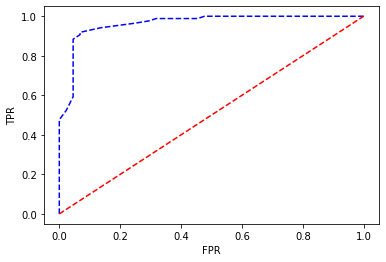

The best regularization coefficient: 0.199
Accuracy Score: 0.92
True Positive Rate: 0.97
False Positive Rate: 0.18




In [ ]:
from copy import deepcopy

class MyLogisticRegressionWithRegularization(MyLogisticRegression):
    def __init__(self, X, y, alpha):
        super().__init__(X, y)
        """Function intializes the Logistic Regression class.

        Parameters:
        -----------
        X_train: ndarray of shape (N,D)
            Numpy array containing N training examples, each D dimensional.

        y_train: ndarray of shape (N,)
            Numpy array containing vector of ground truth classes for examples in X_train

        alpha: float
            The regularization constant
        """

        self.X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
        self.y = y
        self.w  = np.random.randn(self.X.shape[1],1)
        self.alpha = alpha

    ## question i
    # define logistic regression cost function with L2 regularization
    def logit_cost_func(self, w, X, y):
        """function computes value of cost function with L2 regularization given the w vector, the feature tensor, and corresponding targets
        """

        return np.sum(- y.reshape(-1, 1) * np.log(self.sigmoid(X, w)) - (1 - y.reshape(-1, 1)) * np.log(1 - self.sigmoid(X, w))) / X.shape[0] + self.alpha * np.dot(w.reshape(1,-1),w)

    ## question ii
    # define gradient function with the L2 regularization term
    def logit_grad(self, w, X, y):
        """Function computes the gradient of the logistic regression with L2 regularization given the w vector,
        the tensor , and corresponding targets"""

        return -(np.sum((y.reshape(-1,1) - self.sigmoid(X, w).reshape(-1,1))*X, axis=0) / X.shape[0]).reshape(-1,1) + 2 * self.alpha * w

#-----------------Don't change anything below------------------------#

# define train and test sizes
N_train = 20
N_test = 150 - N_train

# define the range for the regularization parameter
alpha_range = np.arange(0,0.2,0.001)

# load data
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Normalize X
X = (X - np.min(X, axis=0, keepdims=True)) / (np.max(X, axis=0, keepdims=True) - np.min(X, axis=0, keepdims=True))

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=N_test, train_size=N_train, random_state=4803)

# train model and predict on test data
best_model = []
best_accuracy = 0
for curr_alpha in alpha_range:
    model =  MyLogisticRegressionWithRegularization(X_train, y_train, alpha=curr_alpha)
    model.fit(num_epochs = 50, step=2)
    y_pred, probs = model.predict(X_test)

    if accuracy_score(y_pred, y_test) > best_accuracy:
        best_accuracy = accuracy_score(y_pred, y_test)
        best_model = deepcopy(model)

        # compute accuracy
        print("The regularization coefficient: %.3f" % curr_alpha)
        print("Accuracy Score: %.2f" % accuracy_score(y_pred, y_test))
        print("True Positive Rate: %.2f" % (np.sum(y_pred.reshape(-1,1) * y_test.reshape(-1,1))/np.sum(y_test)))
        print("False Positive Rate: %.2f" % (np.sum(y_pred.reshape(-1,1) * (1 - y_test).reshape(-1,1))/np.sum(1 - y_test)))
        print("\n")

# plot ROC
y_pred, probs = best_model.predict(X_test)
TPR, FPR = roc(probs, y_test)
plt.plot(FPR, TPR, linestyle='--', color='blue')
plt.plot([0,1],[0,1], linestyle='--', color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

print("The best regularization coefficient: %.3f" % curr_alpha)
print("Accuracy Score: %.2f" % accuracy_score(y_pred, y_test))
print("True Positive Rate: %.2f" % (np.sum(y_pred.reshape(-1,1) * y_test.reshape(-1,1))/np.sum(y_test)))
print("False Positive Rate: %.2f" % (np.sum(y_pred.reshape(-1,1) * (1 - y_test).reshape(-1,1))/np.sum(1 - y_test)))
print("\n")


### **Problem 3: Performance Evaluation Metrics for Classification Accuracy (20pts)**

**Note:** it may take another week before we cover, in lecture, the material that covers this problem. 

Having just implemented two classifiers and done an initial performance evaluation via the accuracy score, we now move onto a more thorough and involved performance analysis. Although the accuracy metric may provide a quick baseline to judge results with, it can be very misleading in case of imbalanced training datasets, where some classes are dominated by others. Another performance metric that can be very useful in this case is the **Receiver Operating Characterists (ROC) curve**. It is essentially a plot of the True Positive Rate (TPR) against the False Positive Rate (FPR) for various thresholds on the posterior probabilties predicted by the classifier. Read the following questions carefully and answer as appropriate.

**Problem 3 (a) (10pts)**<br> In the template code given below, fill in code to compute the TPRs and FPRs for a given posterior probability vector and the corresponding vector of ground-truths. 

**Problem 3 (b) (5pts)**<br> Execute the code to generate a plot of ROC curves for both the logistic regression classifier and the Naïve Bayes classifier for different training set sizes on the `breast_cancer` dataset. What do you observe in each individual subplot regarding how the accuracy metric and the roc curve change relative to the training set size? What do you think is the explanation for this trend? Now compare the the individual plots to each other. Which classifier is more robust in the case of limited data on the `breast_cancer` dataset? 

**Problem 3 (c) (5pts)**<br> We are given four classifiers for which we observe the following cases:
<ol type='i'>
<li> Low TPR, Low FPR
<li> Low TPR, High FPR
<li> High TPR, Low FPR
<li> High TPR, High FPR
</ol>

What does each situation tell us about the respective classifier? Explain in terms of what you think the training data distribution might have been and/or the particular predictive nature of the classifier. 

### <font color='red'>**Problem 3 (a) Solution Copy:</font>**

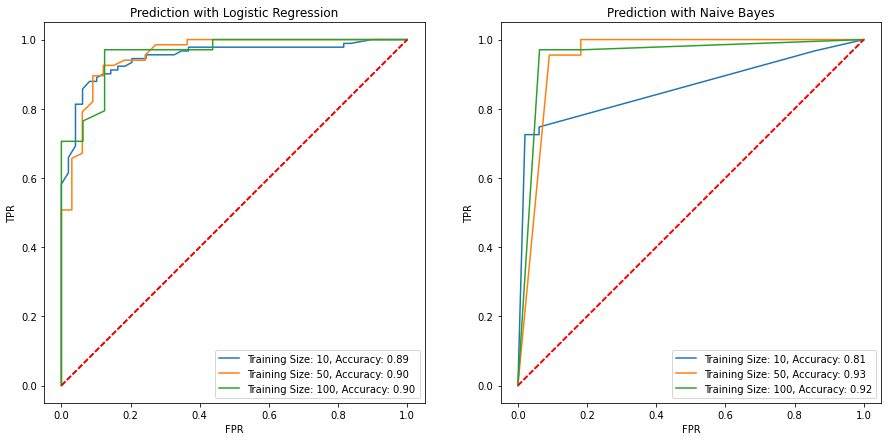

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def roc(probs, y_test):
    """Function returns TPR and FPR given a vector of probabilities and another 
    for ground-truth predictions
    
    Parameters:
    -----------
    probs: ndarray of shape (N,1)
        numpy array of normalized posterior porbabilities for each of N examples in a test dataset
        
    y_test: ndarray of shape (N,1)
        numpy array containing ground-truth class predictions for each of the N examples in test set
        
    Returns:
    --------
    TPR: ndarray of shape (D,1)
        numpy array containing true positive rates for each of the D thresholds applied to the posterior probs
        
    FPR: ndarray of shape (D,1)
        numpy array containing false positive rates for each of the D thresholds applied to the posterior probs
        """
    
    thresholds = np.linspace(-0.1,1,100).reshape(1,-1)
    mask = (probs > thresholds)*1 
    TPR = np.sum(mask * y_test.reshape(-1,1), axis=0) / y_test.sum()
    FPR = np.sum(mask * (1-y_test.reshape(-1,1)), axis=0) / (1 - y_test).sum()
    
    return TPR, FPR

#-----------------Don't change anything below------------------------#

# load data
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Normalize X
X = (X - np.min(X, axis=0, keepdims=True)) / (np.max(X, axis=0, keepdims=True) - np.min(X, axis=0, keepdims=True))

# define training set sizes
training_set_sizes = [10, 50, 100]

# set up plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))

for train_size in training_set_sizes:
    
    # define train and test sizes
    N_train = train_size
    N_test = 150 - N_train

    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=N_test, train_size=N_train, random_state=4803)
 
    # train model and predict on test data
    model =  MyLogisticRegression(X_train, y_train)
    model.fit(num_epochs = 50, step=2)
    y_pred, probs = model.predict(X_test)


    # plot ROC for logistic regression
    TPR, FPR = roc(probs, y_test)
    ax1.plot(FPR, TPR, label='Training Size: %d, Accuracy: %.2f'%(train_size, accuracy_score(y_pred, y_test))) 
    ax1.plot([0,1],[0,1], linestyle='--', color='red') 
    ax1.set_xlabel('FPR')
    ax1.set_ylabel('TPR')
    

    # train model and predict on test data
    model =  MyNaiveBayes(X_train, y_train)
    model.fit()
    y_pred, probs = model.predict(X_test)

    # plot ROC for Naive Bayes
    TPR, FPR = roc(probs[:,1].reshape(-1,1), y_test)
    
    ax2.plot(FPR, TPR, label='Training Size: %d, Accuracy: %.2f'%(train_size, accuracy_score(y_pred, y_test))) 
    ax2.plot([0,1],[0,1], linestyle='--', color='red') 
    ax2.set_xlabel('FPR')
    ax2.set_ylabel('TPR')
    


ax1.set_title('Prediction with Logistic Regression')
ax2.set_title('Prediction with Naive Bayes')    
ax1.legend()
ax2.legend()
plt.show()    

### <font color='red'>**Problem 3 (b) Solution Copy:</font>**


Increasing the size of the training set causes a general trend of improvement in accuracy for both classifers. For Naive Bayes the increase is very drastic from training size 10 to tranining size 50, with accuracy jumping from 0.81 to 0.93. For Logistic Regression, it is very minimal. 

Comparing the plots for Logistic Regression to those for Naive Bayes, it seems Logistic Regression is more robust to limited training data compared to Naive Bayes. The ROC curve for traninig set size 10 is closer to the top left corner compared to the same curve for Naive Bayes. This could partly stem from the fact that as a discriminative classifier (i.e., learns $P(y|\mathbf{x})$), Logistic Regression is able to generalize better to the test data distribution compared to Naive Bayes, which makes a simplistic assumption of feature independence to learn the underlying generative distribution (i.e., learns $P(y,\mathbf{x})$). 
 

### <font color='red'>**Problem 3 (c) Solution Copy:</font>**


Assuming we are thresholding at 0.5 for all of the cases below:

**_i) Low TPR, Low FPR_** \\
This situations speaks of the scenario where the classifier is predicting the negative class samples as negative with high confidence but also predicting a great many positive class samples as negative with high confidence. In other words, the classifer is prioritizing getting the negative class samples right over correct classification of positive class samples. 

**_ii) Low TPR, High FPR_** \\
This is the scenario where the classifier doesn't have much confidence in either its positive or negative class predictions, with quite a few samples from wither class being predicted as belonging to the other one. 


**_iii) High TPR, Low FPR_** \\
This is the ideal case where the classifier is predicting positive class samples as positive with high confidence and negative class samples as negative with high confidence.

**_iv) High TPR, High FPR_**

This is the opposite situation to part (i) where the classifier is predicting positive class samples as positive with high confience but in the process also misclassifying a great portion of negative class samples also as psoitive. In this case, it is prioritizing the correct classification of positive samples over the correct categorization of negative samples.

### **Problem 4: Support Vector Machines**

Support vector machine is an algorithm belonging to the group of the so called maximum margin classifiers. SVMs became popular in the early 90's due to their ability to solve classification, regression and novelty detection problems.


In Lecture 4, Page 30, you have seen that the SVM can be formulated as follows.

\begin{aligned}
\underset{\mathbf{w}, b_i}{\operatorname{minimize}} & \frac{1}{2} \|\mathbf{w}\|_2^2+C \sum_{i=1}^N \max (0,1-y_i (\mathbf{w}^{\top} \mathbf{x}_i-b)) = \underset{\mathbf{w}, b_i}{\operatorname{minimize}} L_{hinge} (\mathbf{w}, b_i) \\
\text { subject to } & y_i\left(\mathbf{w}^{\top} \mathbf{x}_i-b\right) \geq 1-\zeta_i, \quad \zeta_i \geq 0 \quad \forall i \in\{1, \ldots, n\}
\end{aligned}

$$\text{where } \zeta_i = \max (0,1-y_i (\mathbf{w}^{\top} \mathbf{x}_i-b))$$

You will solve this optimization problem using the gradient descent algorithm in this example. The algorithm will work in batches, meaning that the parameters will not be updated after every sample, or the algorithm will not wait for all the training data to be used to calculate the loss. Instead, the parameter update will be performed after a predetermined number of training samples.

We need to calculate the gradient of the loss function $L_{hinge}$ with respect to $\mathbf{w}$ and $b_i$. Considering the formulas presented in the [matrix cookbook](https://gatech.instructure.com/courses/289412/files/38039189?wrap=1) Page 10, the derivative of the max function, and the chain rule, we can find the partial derivatives as follows. First consider the derivative of the $max$ function.

$$
f_{max}(x)=\max (0,g(x)) \\
f_{max}^{\prime}(x)= \begin{cases}g^{\prime}(x) & \text { if } g(x) \geq 0 \\ 0 & \text { if } g(x) \leq 0\end{cases} = \max (0,g'(x))
$$

And the partial derivatives of the hinge loss is follows.

$$
\frac{\partial L_{hinge} (\mathbf{w}, b)}{\partial \mathbf{w}} = \mathbf{w} +C \sum_{i=1}^N max (0,-y_i \mathbf{x}) \\
\frac{\partial L_{hinge} (\mathbf{w}, b)}{\partial b} = C \sum_{i=1}^N max (0,-y_i \mathbf{1}) \\
\text{where } \mathbf{1} \text{ is a column vector with the same size of } b \text{ consisting of ones.} 
$$

**Problem 4 (a) (CHECK)**

Carefully read the questions below and answer them appropriately.

**_i)_** Complete the `hingeloss` function.

**_ii)_** Calculate the code snippet where the gradients are calculated.

**_iii)_** Calculate the code snippet where weights and biases are updated.

**_iv)_** Complete the `predict` function.

> Do not change the function definitions for the functions defined in the SVM class template below. They should take inputs and output results of the form indicated. You are free to add other internal functions and use them inside the class definition as you see convenient. However, that should not change the external code's structure, nor the shape and form of the outputs returned. **_Note_**: Any variable preceded by the `self.` keyword gets stored by the class structure and can be used and changed afterwards inside the class regardless of whether the function that first made it returns it or not.

### <font color='red'>**Problem 4 (a) Solution Copy:</font>**

Loss: 0.1105510127774915
Accuracy: 1.0
w, b: [array([[0.44477983, 0.15109913]]), 0.05700000000000004]


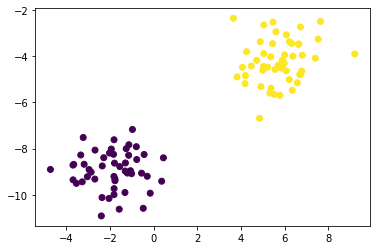

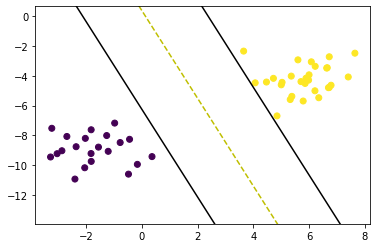

In [ ]:
import numpy as np

class SVM:

    def __init__(self, C = 1.0):
        # C = error term
        self.C = C
        self.w = 0
        self.b = 0
    ## question i
    def hingeloss(self, w, b, x, y):
        """Function computes the hinge loss"""
        """
        Parameters:
        -----------
        w: ndarray of shape (D,)
            1D numpy array representing the normal vector to the SVM hyperplane.

        b: ndarray of shape (D,)
            1D numpy array representing the vector that translates the SVM hyperplane.

        X: ndarray of shape (N,D)
            2D numpy array containing N training examples having D dimensions each.

        Y: ndarray of shape (N,)
            1D numpy array containing containing ground truth class information.

        Returns:
        --------
        y_pred: float
            float containing the hinge loss.

        """
        # hinge loss function / calculation
        # regularization term
        reg = 0.5 * np.dot(w, w.transpose())

        for i in range(x.shape[0]):
            # calculating loss
            opt_term = y[i] * ((np.dot(w, x[i])) + b)
            loss = reg + self.C * max(0, 1-opt_term)
        return float(loss)


    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # the number of features in X
        number_of_features = X.shape[1]

        # the number of Samples in X
        number_of_samples = X.shape[0]

        c = self.C

        # creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)

        # shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # gradient descent algorithm
        for i in range(epochs):
            # calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # appending all losses
            losses.append(l)

            # starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ## question ii
                        # calculating the gradients
                        ti = Y[x] * (np.dot(w, X[x].T) + b)
                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            #w.r.t w
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]
                ## question iii
                # updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb

        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):
        ## question iv
        # prediction
        """Function predicts the output of the SVM"""
        """
        Parameters:
        -----------
        X: ndarray of shape (N,D)
            2D numpy array containing N testing examples having D dimensions each.

        Returns:
        --------
        svm_prediction: ndarray of shape (N,)
            The prediction of the SVM algorithm in the form of integers. (The 
            output should be an element of the set {1, -1}.)
        """
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        svm_prediction = np.sign(prediction)
        return svm_prediction

# Visualizing SVM
def visualize_svm():

    def get_hyperplane_value(x, w, b, offset):
        return (-w[0][0] * x + b + offset) / w[0][1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test)

    x0_1 = np.amin(X_test[:, 0])
    x0_2 = np.amax(X_test[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

#-----------------Don't change anything above------------------------#
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Creating dataset
X, y = datasets.make_blobs(

        n_samples = 100, # Number of samples
        n_features = 2, # Features
        centers = 2,
        cluster_std = 1,
        random_state=40
    )

# Classes 1 and -1
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

svm = SVM()

w, b, losses = svm.fit(X_train, y_train)

prediction = svm.predict(X_test)

# Loss value
lss = losses.pop()

print("Loss:", lss)
# print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, y_test))
print("w, b:", [w, b])

# Visualizing the scatter plot of the dataset
def visualize_dataset():
    plt.scatter(X[:, 0], X[:, 1], c=y)


visualize_dataset()
visualize_svm()


**Problem 4 (b) (CHECK)**

In this part, you will use generate another dataset that is not completely separable and see the behavior of SVM. For this subproblem, adjust the number of data samples to 400 and cluster standard deviations as 4.

### <font color='red'>**Problem 4 (b) Solution Copy:</font>**

Loss: 0.07424717645671335
Accuracy: 0.92
w, b: [array([[0.34281965, 0.16305878]]), 0.24000000000000016]


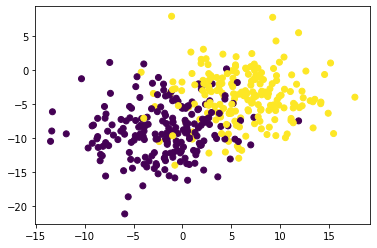

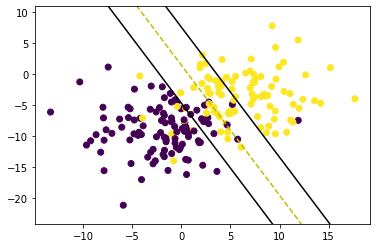

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#-----------------Don't change anything above------------------------#


# Creating dataset
X, y = datasets.make_blobs(

        n_samples = 400, # Number of samples
        n_features = 2, # Features
        centers = 2,
        cluster_std = 4,
        random_state=40
    )

#-----------------Don't change anything below------------------------#


# Classes 1 and -1
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

svm = SVM()

w, b, losses = svm.fit(X_train, y_train)

prediction = svm.predict(X_test)

# Loss value
lss = losses.pop()

print("Loss:", lss)
# print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, y_test))
print("w, b:", [w, b])

# Visualizing the scatter plot of the dataset
def visualize_dataset():
    plt.scatter(X[:, 0], X[:, 1], c=y)


visualize_dataset()
visualize_svm()
